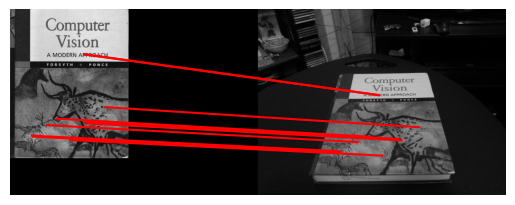

In [3]:
import numpy as np
import cv2
# from matchPics import matchPics
# from helper import plotMatches

cv_cover = cv2.imread('../data/cv_cover.jpg')
cv_desk = cv2.imread('../data/cv_desk.png')


matches, locs1, locs2 = matchPics(cv_cover, cv_desk)

#display matched features
plotMatches(cv_cover, cv_desk, matches, locs1, locs2)


done
(440, 350, 3)


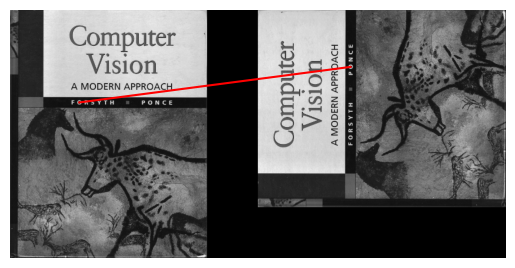

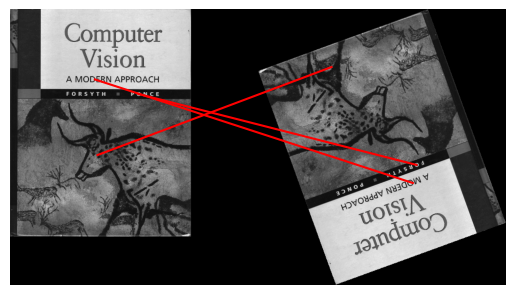

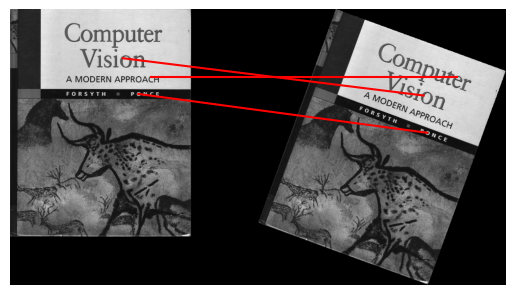

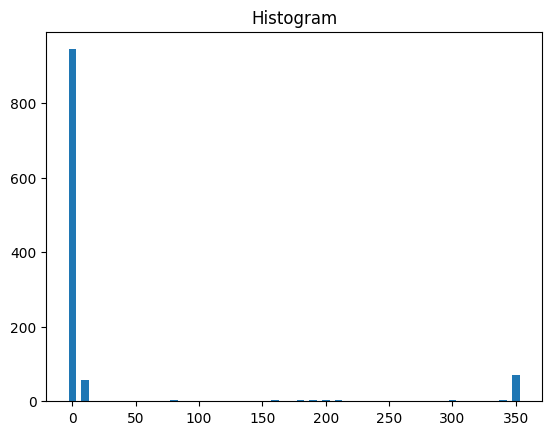

In [4]:
import numpy as np
import cv2
from matchPics import matchPics
from scipy import ndimage
import matplotlib.pyplot as plt
from helper import plotMatches
import os

#Q3.5
#Read the image and convert to grayscale, if necessary
path = '../data/cv_cover.jpg'
img = cv2.imread(path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
degrees = []
matchCount = []
for i in range(36):
    #Rotate Image
    rotated = ndimage.rotate(img, angle=i*10)
    #Compute features, descriptors and Match features
    mathces, locs1, locs2 = matchPics(img, rotated)
    #Update histogram
    degrees.append(i*10)
    matchCount.append(len(mathces))
    if i == 9 : #90 degrees
        plotMatches(img, rotated, mathces, locs1, locs2)
    elif i == 20: #200 degrees
        plotMatches(img, rotated, mathces, locs1, locs2)
    elif i == 34: #340 degrees
        plotMatches(img, rotated, mathces, locs1, locs2)
#Display histogram
plt.bar(degrees, matchCount, width = 6)
plt.title('Histogram')
plt.show()

In [5]:
import numpy as np
import cv2
import skimage.io 
import skimage.color
#Import necessary functions
from planarH import compositeH, computeH_ransac
from matchPics import matchPics

#Write script for Q3.9
#read images
cover = cv2.imread('../data/cv_cover.jpg')
desk = cv2.imread('../data/cv_desk.png')
harry = cv2.imread('../data/hp_cover.jpg')
#homography
matches, locs1, locs2 = matchPics(desk, cover)
points1 = locs1[matches[:, 0]]
points2 = locs2[matches[:, 1]]
H2to1, inliers = computeH_ransac(points1, points2)
#wrap to dimension of desk book
warped = cv2.warpPerspective(harry, H2to1, (desk.shape[1], desk.shape[0]))
#have to resize for it to fit
resized = cv2.resize(harry, (cover.shape[1], cover.shape[0]))
#compose
composite_img = compositeH(H2to1, desk, resized)

cv2.imwrite('../results/HarryPotter.jpg', composite_img)
print("Harry Potter Done")



done H
Harry Potter Done


In [6]:
import numpy as np
import cv2
from loadVid import loadVid
from matchPics import matchPics
from planarH import computeH_ransac, compositeH

movie = cv2.VideoCapture('../data/ar_source.mov')
book = cv2.VideoCapture('../data/book.mov')

frameW = int(book.get(3))
frameH = int(book.get(4))

# Use 'MJPG' for AVI format with Motion JPEG codec
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
# Change the output file extension to .avi
out = cv2.VideoWriter('../results/ar.avi', fourcc, 24, (frameW, frameH))

cover = cv2.imread('../data/cv_cover.jpg')

while True:
    retMovie, movieFrame = movie.read()
    retBook, bookFrame = book.read()
    #disregard
    if not retMovie or not retBook:
        break
    #read
    if cover is not None:
      #without black edges
        trimmed = movieFrame[50:movieFrame.shape[0]-50, :]
        #resize video
        newWidth = int(np.rint((cover.shape[0] / trimmed.shape[0]) * trimmed.shape[1]))
        newHeight = int(np.rint((cover.shape[0] / trimmed.shape[0]) * trimmed.shape[0]))
        scaled = cv2.resize(trimmed, (newWidth, newHeight))
        #slice middle of video
        ratio1 = int(np.rint(cover.shape[1] / 2))
        ratio2 = int(np.rint(scaled.shape[1] / 2))
        midSection = scaled[:newHeight, ratio2 - ratio1:ratio2 + ratio1, :]

        matches, locs1, locs2 = matchPics(bookFrame, cover)
        #put it all together
        if matches.shape[0] < 4:
            continue
        H2to1, inliers = computeH_ransac(np.take(locs1, matches[:, 0], axis=0), np.take(locs2, matches[:, 1], axis=0))
        composite_img = compositeH(H2to1, bookFrame, midSection)

        out.write(composite_img)

movie.release()
book.release()
out.release()

print("video done")

(511, 360, 640, 3)
video done
